In [1]:
1+1

2

In [2]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
from models import misc_mnet as mnet

import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev
from utils import notebook_utils as nu



import copy

import csv
import ast
from source import yaml_utils as yu

In [3]:
targdir_path = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeglasso'
tp=10

Mlist = []
config = nu.load_config(targdir_path)
logs = nu.read_log(targdir_path)

training_loss = [logs[k]['train/loss'] for k in range(len(logs))]
dataconfig = config['train_data']
dataconfig['args']['T'] = config['T_cond'] + tp
reload(sm)
data = yu.load_component(dataconfig)
config['batchsize']=8

train_loader = DataLoader(data, batch_size=config['batchsize'], shuffle=True, num_workers=config['num_workers'])

/usr/local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
from tqdm import tqdm
images = iter(train_loader).next()
images = torch.stack(images)
images = images.transpose(1, 0)

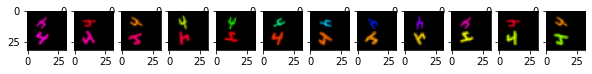

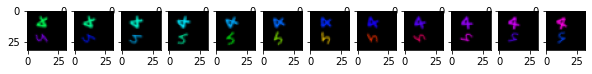

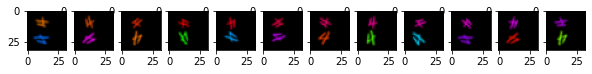

In [5]:
for check_idx in range(3):
    plt.figure(figsize=(10,10))
    for k in range(len(images[0])):
        plt.subplot(1, len(images[0]), k+1)
        plt.imshow(images[check_idx][k].permute([1,2,0]))

/tmp/ipykernel_4410/3149045191.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0]))
/tmp/ipykernel_4410/3149045191.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0]))


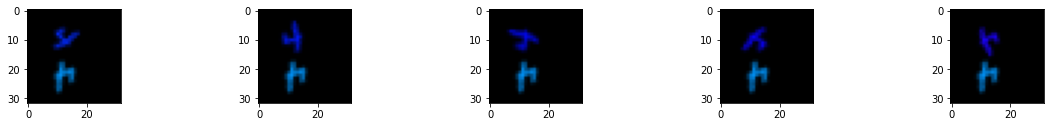

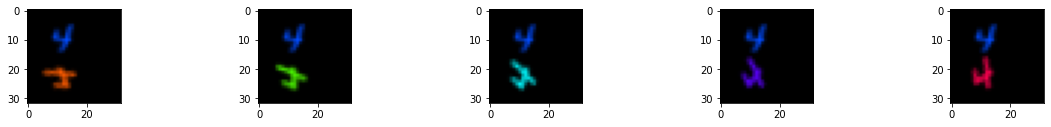

In [7]:
from utils import optimize_lasso as ol 
mode = targdir_path
datseqs1, datseqs2 = ol.obtain_pair_sequences(mode, size=30, T=5)

idd = 0
datseq1= datseqs1[idd]
datseq2= datseqs2[idd]


plt.figure(figsize=(20,10))
for k in range(len(datseq1)):
    plt.subplot(5, len(datseq1),  k+1)
    plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0])) 

plt.figure(figsize=(20,10))
for k in range(len(datseq2)):
    plt.subplot(5, len(datseq2),  k+1)
    plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0])) 

In [11]:
data.pair_transition

False